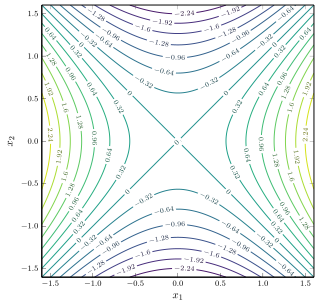

In [69]:
using Plots, LaTeXStrings, Printf, LinearAlgebra, Random
pgfplotsx() #pyplot()

# Rosenbrock function
f(x1,x2) = x1^2 - x2^2

x1 = -1.6:0.01:1.6
x2 = -1.6:0.01:1.6

pl1 = contour(x1, x2, f, framestyle = :box,
    c = cgrad(:viridis, rev = false), 
    ylab = L"x_2", 
    xlab = L"x_1",
    xlims = (-1.6,1.6),
    ylims = (-1.6,1.6),
    legend = false,
    grid = false,
    contour_labels = true,
    bins = 150,
    label = false, size = (450, 450))

In [70]:
Random.seed!(2);

In [71]:
# Gradient Descent
struct GradientDescent
    α
end

init!(M::GradientDescent, f, ∇f, x) = M

function step!(M::GradientDescent, f, ∇f, x)
    α, g = M.α, ∇f(x)
    return x - α*g
end

step! (generic function with 2 methods)

In [72]:
# Noisy for Gradient Method
mutable struct NoisyDescent
    submethod
    σ
    k
end

function init!(M::NoisyDescent, f, ∇f, x)
    init!(M.submethod, f, ∇f, x)
    M.k = 1
    return M
end

function step!(M::NoisyDescent, f, ∇f, x)
    x = step!(M.submethod, f, ∇f, x)
    σ = M.σ*(M.k)
    x += σ.*randn(length(x))
    M.k += 1
    return x
end

step! (generic function with 2 methods)

In [73]:
m = GradientDescent(0.2)
M = NoisyDescent(m, 0.1, 1)

NoisyDescent(GradientDescent(0.2), 0.1, 1)

In [74]:
A = [1 0; 0 -1]
fx = x -> dot(x, A*x)
∇f = x -> (A + A')*x

pointsGD = []
pointsSGD = []
x0GD = [1.5, 0.0]
x0SGD = [1.5, 0.0]

push!(pointsGD, (x0GD))
push!(pointsSGD, (x0SGD))

1-element Array{Any,1}:
 [1.5, 0.0]

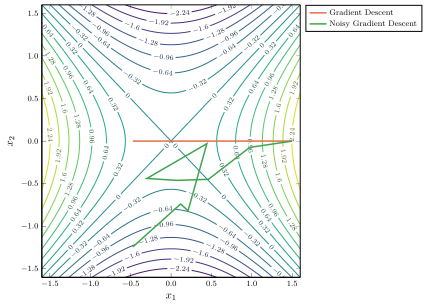

In [75]:
N = 8

for i=1:N
    xGD = step!(M.submethod, fx, ∇f, x0GD)
    xSGD = step!(M, fx, ∇f, x0SGD)
    push!(pointsGD, (xGD))
    push!(pointsSGD, (xSGD))
    
    x0GD = xGD
    x0SGD = xSGD
end

plot!([P[1] for P in pointsSGD], [P[2] for P in pointsGD], label = "Gradient Descent", legend = true, lw = 1.5)
plot!([P[1] for P in pointsSGD], [P[2] for P in pointsSGD], label = "Noisy Gradient Descent", legend = true, lw = 1.5)

In [76]:
savefig(pl1, "8.1 Noisy Descent.svg")